# Predicting Wine Types

## Importing the dataset

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

## Data Preprocessing
We will assign 1 for red wine and 0 for white wine.

In [182]:
dataset = pd.read_csv("data/wine_dataset.csv")
dataset['style'] = dataset['style'].replace('red', 1)
dataset['style'] = dataset['style'].replace('white', 0)
df = pd.DataFrame(dataset)
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


## Data Analysis and Visualization

In [183]:
print(df[df.columns[0:12]])

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

In [184]:
dataset.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [185]:
# sns.pairplot(df,hue='style')

### Correlation Matrix

In [186]:
corr = df.corr()
corr.style.background_gradient()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


Rq:
density and alcohol are the most correlated features

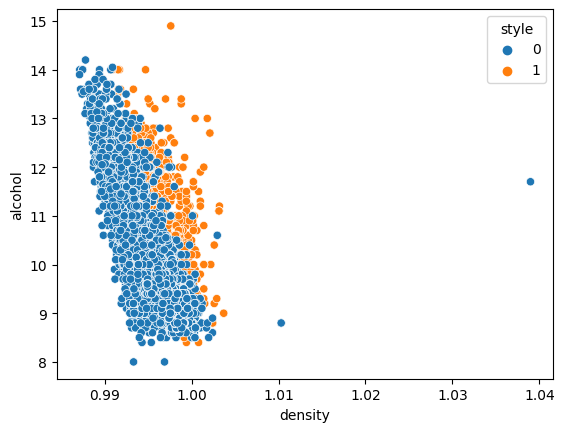

In [187]:
sns.scatterplot(data=df, x='density', y='alcohol', hue='style')
plt.show()

In [188]:
X = dataset.values[:,range(0,12)]
y = dataset.values[:,range(12,13)]
print(X)
print(y)

[[ 7.4   0.7   0.   ...  0.56  9.4   5.  ]
 [ 7.8   0.88  0.   ...  0.68  9.8   5.  ]
 [ 7.8   0.76  0.04 ...  0.65  9.8   5.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [189]:
print('dimensions de X:', X.shape)
print('dimensions de Y:', y.shape)

dimensions de X: (6497, 12)
dimensions de Y: (6497, 1)


## Preparing the model

In [190]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [191]:
initialisation(X)

(array([[ 1.54032255],
        [ 0.88558016],
        [ 2.65347141],
        [-0.2084579 ],
        [ 1.49036595],
        [ 0.01342307],
        [-1.67926498],
        [ 0.45990611],
        [ 0.08628405],
        [ 0.18637489],
        [ 0.07453387],
        [ 1.4604281 ]]),
 array([-1.20724565]))

In [192]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [193]:
W,b = initialisation(X)
model(X,W,b)


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [194]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [195]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [196]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [197]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [198]:
def artificial_neuron(X, y, learning_rate = 0.01, n_iter = 1000):
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)

    plt.plot(Loss)
    
    print("Accuracy: ",accuracy_score(y, y_pred))
    print("Recall: ",recall_score(y, y_pred))
    print("Precision: ",precision_score(y, y_pred))


    return (W, b)
    

C:\Users\MSI\AppData\Local\Temp\ipykernel_12788\779446396.py:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
C:\Users\MSI\AppData\Local\Temp\ipykernel_12788\779446396.py:2: RuntimeWarning: invalid value encountered in multiply
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))


Accuracy:  0.9364321994766815
Recall:  0.758599124452783
Precision:  0.978225806451613


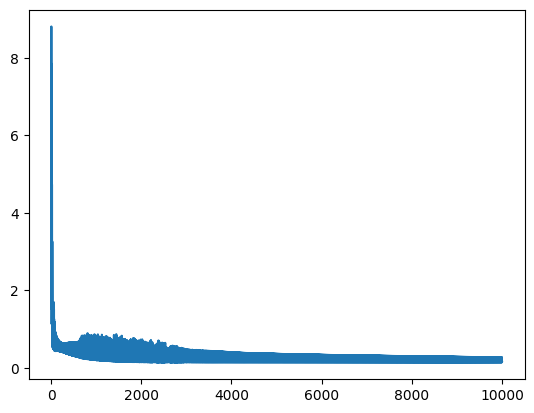

In [199]:
W, b = artificial_neuron(X,y)

In [200]:
new_wine=np.array([8.9, 0.22, 0.48, 1.8, 0.0077, 29.0, 60.0, 0.9968,3.39, 0.53, 9.4, 6.0]) # white_wine
new_wine2=np.array([8.9,0.62,0.19,3.9,0.17,51,148,0.9986,3.17,0.93,9.2,5]) # red_wine
res = predict(new_wine2, W ,b)

if res : 
    print('The type of this wine is white')
else:
    print('The type of this wine is red')


The type of this wine is red
